# Run this cell first

In [1]:
# @title
# this code enables the automated feedback. If you remove this, you won't get any feedback
# so don't delete this cell!
try:
  import AutoFeedback
except (ModuleNotFoundError, ImportError):
  %pip install AutoFeedback
  import AutoFeedback

try:
  from testsrc import test_main
except (ModuleNotFoundError, ImportError):
  %pip install "git+https://github.com/autofeedback-exercises/exercises.git#subdirectory=POP_SUMMER_SCHOOL/Daytime-temperatures"
  from testsrc import test_main

def runtest(tlist):
  import unittest
  from contextlib import redirect_stderr
  from os import devnull
  with redirect_stderr(open(devnull, 'w')):
    suite = unittest.TestSuite()
    for tname in tlist:
      suite.addTest(eval(f"test_main.UnitTests.{tname}"))
    runner = unittest.TextTestRunner()
    try:
      runner.run(suite)
    except AssertionError:
      pass

# Introduction

The exercises in this notebook are designed to accompany the quiz on daytime temperatures at the equator. As you saw in the last of these exercises you can use, python to help you with your homework.

You need to start by executing the following cell, which imports the libraries that we need.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Question 1

We will again use what we learned about writing functions to solve the problems in the quiz. The instructions in the quiz tell us that the temperature of the moon, $T$, is given by the following expression:

$$
(1-\alpha) \frac{S_0}{d^2} \cos \phi = \epsilon \sigma T^4
$$

We are also told that:

$$
\frac{S_0}{d^2} = 1361 \qquad \alpha = 0.12 \qquad \epsilon = 0.98 \qquad \sigma = 5.67 \times 10^{-8}
$$

while:

$$
\phi = 15(t-12)
$$

where $t$ is the time of day.  

Your task is to use this information to write a function called `moon_temperature` that takes one argument.  This argument tells the function the time of day $t$.  Your function should return the temperature, $T$, at that time of day. If you write this function in the cell below and run the cell immediately afterwards it will tell you whether your program has been implemented correctly or not.  Once you have written this function you can then use it to generate the answers for question 1 in the quiz.

Note that the angle $\phi$ that is returned by the following equation:

$$
\phi = 15(t-12)
$$

is in degrees. To take the cosine of a number with python you can use the function `np.cos`.  However, this function expects the input angle to be in radians.  To convert the angle $\phi$ in degrees to the angle $\phi'$ in radians you can use the following expression:

$$
\phi' = \pi \frac{\phi}{180}
$$

Notice, furthermore, that if you want to use $\pi$ in your function  you can use the variable `np.pi` that is defined when you load the NumPy library.

In [3]:
runtest(["test_moontemp"])

The function moon_temperature does not exist.
    Ensure you have named the function properly, bearing in mind that capital
    letters matter. Also ensure that you have used the proper syntax for the
    definition of a function, i.e.
        def moon_temperature(inputs):
            ...
    



# Question 1 continued

Lets now use combine what we learned about programming from the first of these notebooks with what we learned in the exercise above.  We are going to draw a graph that shows how the temperature changes over a typical day on the moon.  We will consider a Lunar Day that starts at 07:00 and finishes at 17:00.  We will then calculate the temperature on every hour of that day.  You will thus need to create a NumPy array that contains all the integers that are greater than or equal to 7 and less than or equal to 17.

Once you have created this NumPy array you will use the formulas (or the function) from the previous exerecise to create a second NumPy array that contains the temperatures at each of those times of day.

You should then be able to plot a graph that has the temperatures on the y-axis and the times of day on the x-axis. The axes on this graph should be labelled.  The x-axis label will be "time of day", the y-axis label will be "Temperature at equator / K."  

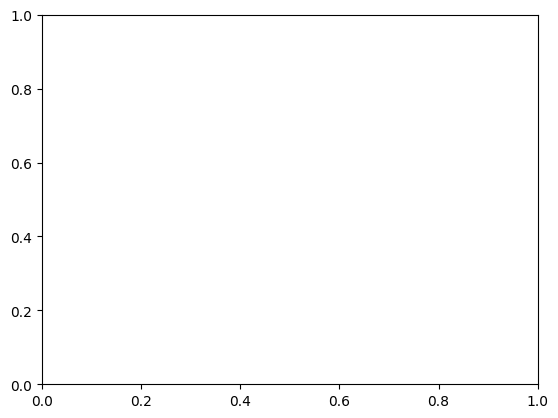

In [4]:

fighand = plt.gca()

In [5]:
runtest(["test_moongraph1"])

The number of data sets plotted is incorrect.
    Check that the number of datasets plotted matches the number requested in
    the instructions



# Question 2

In the second question we are trying to develop an interepretation of the times that we used in x-axis of the last figure and that you have been inserting into the `moon_temperature` function.  What I want you to recognise is that the temperature does not change by over 100 K over the course of 12 Earth hours.  

Much as we do on Earth, we can measure the time on the moon by looking at the position of the sun in the sky.  However, the sun moves across the moon's sky much more slowly than it does across the Earth's. On Earth the sun appears to fully rotate around us every 24 hours.  By contrast, if you were on the moon, if you were on the moon the sun would appear to take 29.5 Earth days to rotate around you.

In the cell below, I would thus like you to write a function called `moon_rotation` that takes in a duration of time in Earth hours.  Your function should return the angle in degrees that you would observe the sun to rotate through if you spent that amount of time on the moon.

If you implement this function correctly you can use it to answer question 2 on the quiz.

_Hint: The sun rotates though 360 degrees if you spend 29.5 Earth days on the surface of the moon._



In [6]:
runtest(["test_moon_rotation"])

The function moon_rotation does not exist.
    Ensure you have named the function properly, bearing in mind that capital
    letters matter. Also ensure that you have used the proper syntax for the
    definition of a function, i.e.
        def moon_rotation(inputs):
            ...
    



# Question 2 continued

Lets now return to the graph that we plotted in the last but one exercise and try to use a more intuitive unit of time for the x-axis.  

For this exercise, I would like you to plot the temperatures on the surface of the moon that you calculated in the previous exercise. You probably stored these temperatures in a NumPy array in the previous exercise.  You can reuse this same list of temperatures for the y-coordinates of your graph here.

I would like you to transform the list of times at which the points were plotted (i.e. the x-coordinates of the points in your graph) from lunar times to times elapsed since 7 AM lunar time in Earth days.  Recall that a lunar day is decomposed into 24 lunar hours.  However, a lunar day is 29.5 Earth days long.  The x-axis label for your graph should read "time / Earth days" while the y-axis label should be "Temperature at equator / K".

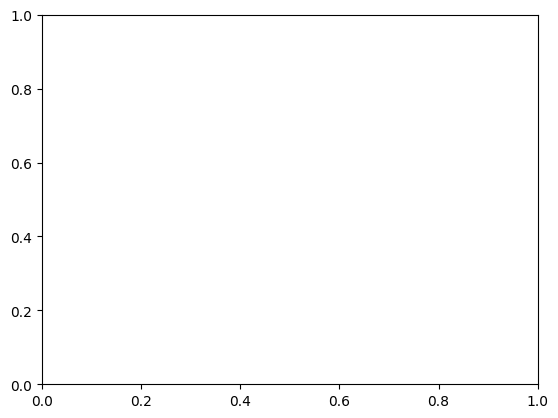

In [7]:


fighand = plt.gca()

In [8]:
runtest(["test_moongraph2"])

The number of data sets plotted is incorrect.
    Check that the number of datasets plotted matches the number requested in
    the instructions



# Question 3

I would now like you to write a second function for calculating the temperature on the surface of the moon called `lunar_temperature`.  This function should again take a single argument - how far in degrees that the sun is above the horizon.  Within your function you will need to:

1. Convert this input angle to a value $\phi$ in degrees - read the definition of $\phi$ in the instructions to learn how to do this.
2. Convert $\phi$ from degrees to radians.
3. Calculate the temperature (in Kelvin) on the moon for this $\phi$ value using the formula that was introduced in question 1.

Your function should return the temperature on the Moon's surface for the input angle in Celsius.  You can get the temperature in Celsius by subtracting 273 from the temperature in Kelvin.

You should be able to answer questions 3 and 4 in the quiz using your function.

In [9]:
runtest(["test_lunar_temperature"])

The function lunar_temperature does not exist.
    Ensure you have named the function properly, bearing in mind that capital
    letters matter. Also ensure that you have used the proper syntax for the
    definition of a function, i.e.
        def lunar_temperature(inputs):
            ...
    

